# Ayudantía 9: I/O y Serialización 🤓

## *Bits* y *Bytes*
Un *byte* es la estructura básica para guardar datos en computación. A su vez, un *byte* está compuesto por 8 *bits*, y cada *bit* es un número que puede ser 1 o 0. Usamos esta estructura (*byte*) para medir el tamaño de los archivos.

<img width="800" src="img/bit_bytes.png">

## Sistema hexadecimal
Por lo general, en computación se utiliza el sistema hexadecimal de representación de *bytes*. 

<img width="550" src="img/hexadecimal.png">

## Codificación
Podríamos decir que el *Byte* 0 corresponde a la letra a, el *Byte* 1 corresponde a b, el *Byte* 2 corresponde a c, etc, hasta cubrir todos los caracteres que queremos representar. Esa asociación se conoce como codificación o encoding.

## Codificación ASCII
Una codificación muy común es la codificación ASCII, que data de 1963 y asocia números (*Bytes*) con caracteres de la siguiente manera:

<img width="550" src="img/ascii.jpg">

## Objeto *Byte*
Un objeto de tipo *bytes* es una secuencia inmutable, tal como los str. Para declarar que un objeto es un byte simplemente se pone al comienzo del objeto una b. Por ejemplo:

In [35]:
# Lo que está entre las comillas es un objeto de tipo bytes
# La notación \x44 indica el valor hexadecimal 44
# Este ejemplo almacena los caracteres D, u, a,  , L, i, p, a
nombre = b"\x44\x75\x61\x20\x6c\x69\x70\x61"
print(nombre)
print(type(nombre))

b'Dua lipa'
<class 'bytes'>


## No se tienen que aprender la tabla ASCII de memoria 🥳
En python existen funciones para convertir los caracteres a su versión en *bytes*. Algunas de ellas son `encode` y `decode`

## Ejemplo 🎶
Queremos codificar y decodificar la letra de un famosa canción.

In [7]:
letra = "¿Quién es ese hombreEeEe?"

# Utilizamos encode() para codificar la letra de nuestra canción
letra_codificada = letra.encode()

print(letra_codificada)

b'\xc2\xbfQui\xc3\xa9n es ese hombreEeEe?'


Notamos que la representación en bits de "¿" y "é" está en sistema hexadecimal. Esto se debe a que estos caracteres no existen en la codificación ASCII. ¡Pero no hay problema! las funciones `encode` y `decode` utilizan codificación "UTF-8", la cual incluye estos caracteres, por lo que al decodificar podremos visualizar nuestra letra correctamente 😄.

In [8]:
# Y ahora, hacemos el proceso inverso utilizando decode() para decodificar
letra_decodificada = letra_codificada.decode()

print(letra_decodificada)

¿Quién es ese hombreEeEe?


## *bytes()* y *bytearray()*
Podemos usar 2 métodos para definir la estructura de los bytes: *bytes()* y *bytearray()*, y el método que usemos va a depender de la funcionalidad que necesitemos.
- ¿Quieres usar una estructura inmutable, similar a un string? Usa *bytes()*
- ¿Quieres usar una estructura mutable, similar a una lista? Usa *bytearray()*

## Ejemplo 💃
Queremos que nuestro programa convierta en *bytes* la letra de la famosa canción "Yo tomo vino y cerveza".

In [3]:
letra = "Yo tomo vino y cerveza para olvidarme de ella"

# Utilizamos bytes() para pasar nuestra letra a bytes
# Esta función recibe 2 argumentos, el string a convertir y el encoding
# Utilizamos encoding "utf-8", ya que, es el que más nos conviene
byte_letra = bytes(letra, 'utf-8')
print(byte_letra)

b'Yo tomo vino y cerveza para olvidarme de ella'


Pero a nuestra letra le falta algo importante 🤔, olvidamos que entre medio se debe gritar "PISCO Y RON" en la canción.

In [4]:
letra_faltante = " PISCO Y RON ".encode()
byte_letra[22] = letra_faltante
print(byte_letra)

TypeError: 'bytes' object does not support item assignment

## Problema 😥
No podemos cambiar la estructura de los *bytes* dado que estos son inmutables.

## Solución 🎊
Podemos utilizar bytearray() para mutar nuestro byte.

In [5]:
# Reescribimos nuestra letra ttilizando bytearray()
arr_letra = bytearray(byte_letra)
print(arr_letra)

bytearray(b'Yo tomo vino y cerveza para olvidarme de ella')


### letra_faltante = " PISCO Y RON ".encode()
arr_letra[22] = letra_faltante
print(arr_letra)

## Chunks
Cuando trabajamos con una cantidad importante de *bytes*, no es conveniente leerlos todos a la vez, ya que pueden ser muchos y no caber en nuestra memoria; ni tampoco uno por uno, pues requiere más operaciones de lectura de datos y puede ser muy lento. Por tanto, lo más conveniente es leer los bytes en chunks o grupos de *bytes*. Por ejemplo:

In [8]:
cancion = ("si hay que ser torero, poner el alma en el ruedo," 
    "no importa lo que se venga pa que sepas que te quiero como un buen torero")
bytes_cancion = bytearray(cancion.encode())
TAMANO_CHUNK = 4

for i in range(0, len(bytes_cancion), TAMANO_CHUNK):
    # Aqui obtenemos nuestro chunk
    chunk = bytearray(bytes_cancion[i:i+TAMANO_CHUNK])
    print(chunk)

bytearray(b'si h')
bytearray(b'ay q')
bytearray(b'ue s')
bytearray(b'er t')
bytearray(b'orer')
bytearray(b'o, p')
bytearray(b'oner')
bytearray(b' el ')
bytearray(b'alma')
bytearray(b' en ')
bytearray(b'el r')
bytearray(b'uedo')
bytearray(b',no ')
bytearray(b'impo')
bytearray(b'rta ')
bytearray(b'lo q')
bytearray(b'ue s')
bytearray(b'e ve')
bytearray(b'nga ')
bytearray(b'pa q')
bytearray(b'ue s')
bytearray(b'epas')
bytearray(b' que')
bytearray(b' te ')
bytearray(b'quie')
bytearray(b'ro c')
bytearray(b'omo ')
bytearray(b'un b')
bytearray(b'uen ')
bytearray(b'tore')
bytearray(b'ro')


## Endianess
El *endianess* ("extremidad" en inglés) nos dice el formato en el que se almacenan los datos de un conjunto de bytes (1 o más) en un ordenador. El problema es similar a los idiomas en los que se escribe de derecha a izquierda, como el árabe, o el hebreo, frente a los que se escriben de izquierda a derecha, como el español y el inglés.

### big-endian
En este formato, el *byte* más significativo se almacena en primer lugar y los demás *bytes* le siguen en orden de significado descendente.

### little-endian
Aquí sucede al revés, en este formato el *byte* menos significativo se almacena en primer lugar y los demás *bytes* le siguen en orden de significado ascendente.

## *from_bytes()* y *to_bytes()*
Ahora que ya aprendimos de *big* y *little endian*, podemos ver como los vamos a usar en el curso.
### *from_bytes()*
La función *from_bytes()* nos permite convertir la información en *bytes* a un número. Esta función recibe dos parámetros, los *bytes* a convertir y el orden en el que vienen.

In [2]:
print(int.from_bytes(b'\x01\x11', byteorder='big')) # 0111 = 273

273


In [3]:
print(int.from_bytes(b'\x01\x11', byteorder='little')) # 0111 = 4353

4353


### *to_bytes()*
La función *to_bytes()* nos permite convertir un número en *bytes*. Al igual que *from_bytes()*, esta función recibe dos parámetros, pero son el primero es diferente. Ahora necesitamos la cantidad de *bytes* que usaremos para escribir el número convertido y el orden a usar.

In [8]:
numero_a_convertir = 2233
numero_a_convertir.to_bytes(4, byteorder="big")

b'\x00\x00\x08\xb9'

In [5]:
numero_a_convertir = 2233
numero_a_convertir.to_bytes(4, byteorder="little")

b'\xb9\x08\x00\x00'

## Lectura de Archivos
### *open()*
Aprendimos a usar *open()* para archivos de texto solamente, pero en verdad esta función nos permite leer cualquier tipo de archivo! La diferencia para usarlo para trabajar con *bytes*, es que debemos agregar una "b", de ***binary***, a todos los comandos usados anteriormente ("w" pasa a ser "wb", "r" pasa a ser "rb" y así)

In [1]:
caracteres = b'\x68\x65\x6c\x6c\x6f'
with open('datos.bin', 'wb') as byte_file:
    byte_file.write(caracteres)

with open('datos.bin', 'rb') as byte_file:
    datos = byte_file.read()
    print(datos)

b'hello'


# Serialización 🤖

Es el procedimiento de transformar cualquier objeto en una secuencia o serie de bytes. Esto nos permite almacenar el estado de un objeto de forma persistente, por ejemplo en un archivo o una base de datos que podamos consultar más tarde. También nos permite enviar el objeto a otros computadores y programas.

## Pickle 🥒
Este módulo nos permite guardar/cargar casi cualquier objeto incluyendo listas.

### Métodos: 
* `dumps`: Serializa un objeto.
* `loads`: Carga un objeto serializado a su estado original.

In [1]:
import pickle
lista = ["one", "direction", 1, 2, 3]
print(f"Soy una {type(lista)} y contengo {lista}\n")


lista_serializada = pickle.dumps(lista)
print(f"Soy una {type(lista_serializada)} y contengo {lista_serializada}\n")

lista_deserializada = pickle.loads(lista_serializada)
print(f"Soy una {type(lista_deserializada)} y contengo {lista_deserializada}\n")

Soy una <class 'list'> y contengo ['one', 'direction', 1, 2, 3]

Soy una <class 'bytes'> y contengo b'\x80\x04\x95\x1d\x00\x00\x00\x00\x00\x00\x00]\x94(\x8c\x03one\x94\x8c\tdirection\x94K\x01K\x02K\x03e.'

Soy una <class 'list'> y contengo ['one', 'direction', 1, 2, 3]



### Archivos:

Hasta ahora para guardar información en archivos había que guardar los datos en largos strings separados por comas (Formato csv). Por ejemplo, queremos guardar la letra de nuestra canción favorita (Baby Shark🦈) en forma de lista:

In [2]:
lista = ["baby", "shark", "dudududu"]

# Para guardar cosas en un archivo .csv debemos pasar la lista a un string

string = ""
for elemento in lista:
    string += (elemento + ",")
string = string[:-1] + ("\n")

# Luego abrir el archivo
with open("archivo_prueba.csv", "w") as file:
        file.write(string)

# Y para recuperarlas se debe leer el archivo y después pasar el string a una lista
with open("archivo_prueba.csv", "r") as file:
    string = file.read().strip()
    lista_recuperada = string.split(",")

print(lista_recuperada)

['baby', 'shark', 'dudududu']


Ahora se puede guardar el objeto directamente con pickle. Al serializarlo este perdura y esta listo para ser usado en el futuro. Los métodos `dump` y `load` serializan a través de archivos.

In [3]:
import pickle

lista = ["baby", "shark", "dudududu"]

# Esta vez, para guardar la lista en un archivo solo basta serializarla
# y escribir directamente sus bytes

with open("archivo_prueba.bin", "wb") as file:
    pickle.dump(lista, file)

# Para recuperarla solo se debe leer el archivo y deserializarlo
    
with open("archivo_prueba.bin", "rb") as file:
    lista_recuperada = pickle.load(file)

print(lista_recuperada)

['baby', 'shark', 'dudududu']


## JSON 👻
Es un formato estándar de intercambio de datos que puede ser interpretado por muchos lenguajes, y por ende es algo ampliamente utilizado para traspasar información de un programa a otro (por ejemplo, la comunicación entre dos computadores mediante internet)

En el módulo json ocuparemos los mismos métodos de pickle (`dumps` y `loads`). 

In [4]:
import json

class Cantante:
    def __init__(self, nombre, estilos, n_grammys):
        self.nombre = nombre
        self.estilos = estilos
        self.n_grammys = n_grammys

            
c = Cantante("Beyonce", ["R&B", "Pop", "Soul", "Hip-Hop"], 32)

json_string = json.dumps(c.__dict__)
print("datos en formato JSON:", type(json_string), json_string)
json_deserializado = json.loads(json_string)
print("datos en formato Python:", type(json_deserializado), json_deserializado)

datos en formato JSON: <class 'str'> {"nombre": "Beyonce", "estilos": ["R&B", "Pop", "Soul", "Hip-Hop"], "n_grammys": 32}
datos en formato Python: <class 'dict'> {'nombre': 'Beyonce', 'estilos': ['R&B', 'Pop', 'Soul', 'Hip-Hop'], 'n_grammys': 32}


## Pickle v/s JSON

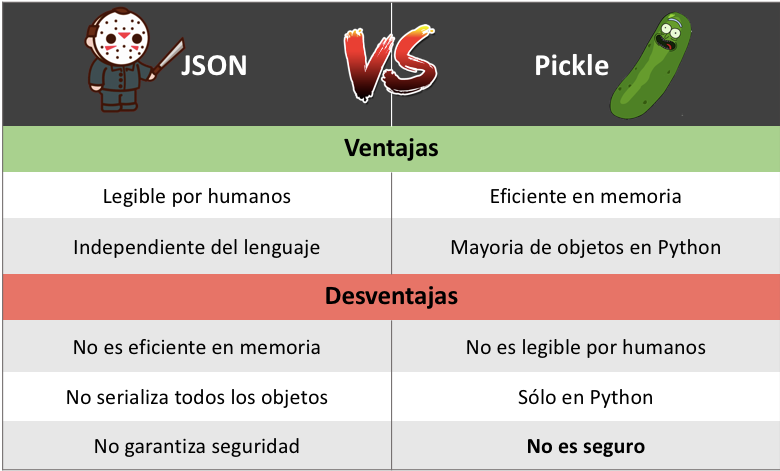

## Personalización

### *Get State*
* Cómo guardaremos la información que se va a serializar. Si queremos cambiar algún atributo o encriptar.

#### **Pickle**
Implementar el método `__getstate__` dentro de la misma clase para personalizar la serialización.

#### **Json**
Debemos crear una clase que personalice la serialización. Se crea una clase que herede de `json.JSONEncoder` y se sobreescribe el método `default`.

### *Set State*
* Cómo cargaremos la información que se va a deserializar. Si queremos cambiar algún elemento o desencriptar.

#### **Pickle**
Implementar el método `__setstate__` dentro de la misma clase para personalizar la deserialización.

#### **Json**
Debemos crear una función que personalice la deserialización. Se entrega esta función como parámetro de `object_hook` a los métodos de `load` y `loads`.

## Ejemplos de personalización

In [18]:
import pickle
import json

class AudioPlayerDevice:

    def __init__(self, marca, modelo):
        self.marca = marca
        self.modelo = modelo
        self.canales = ["Spotify", "Apple Music", "YouTube", "SoundCloud"]

    def __getstate__(self):
        informacion = self.__dict__.copy()
        print("Están guardando mi información...")
        informacion.update({"canales": "Canales Mas Usad"})
        print("Mis canales serializados son: " + informacion["canales"])
        # Lo que retornemos es lo que será serializado por pickle
        return informacion

    def __setstate__(self, estado):
        print("Están cargando mi información...")
        # Al deserializar modificamos el estado
        estado.update({"modelo": f"{estado['modelo']} usado"})
        self.__dict__ = estado
        print("Mi modelo deserializado es: " + estado["modelo"])

class AudioPlayerEncoder(json.JSONEncoder):

    def default(self, objeto):
        # Serializa en forma personalizada el AudioPlayer
        return {
            "estado": "usado",
            "marca": objeto.marca,
            "modelo": objeto.modelo,
            "canales": objeto.canales,
            "antiguedad": 4,
            }

def funcionDecoder(diccionario):
    diccionario["estado"] = "usado y deserializado"
    diccionario["antiguedad"] = 10
    return diccionario

In [20]:
tv = AudioPlayerDevice("Apple", "ipod touch")
print(f"Soy un reproductor de audio {tv.marca} modelo {tv.modelo}")
print("Mis canales son: " + ", ".join(tv.canales))

print("\nPersonalizando con pickle")
# Al usar pickle.dumps() se ejecuta el método __getstate__
pickle_serializado = pickle.dumps(tv)
# Al usar pickle.loads() se ejecuta el método __setstate__
pickle_deserializado = pickle.loads(pickle_serializado)

print("\nPersonalizando con json")
# Al usar json.dumps() se entrega la clase creada con json.JSONEncoder
json_serializado = json.dumps(tv, cls=AudioPlayerEncoder)
# Al usar json.lodas() se entrega la función creada para deserializar
json_deserializado = json.loads(json_serializado, object_hook = funcionDecoder)

print("Serializando...")
print(json_serializado)
print("Deserializando...")
print(json_deserializado)

Soy un reproductor de audio Apple modelo ipod touch
Mis canales son: Spotify, Apple Music, YouTube, SoundCloud

Personalizando con pickle
Están guardando mi información...
Mis canales serializados son: Canales Mas Usad
Están cargando mi información...
Mi modelo deserializado es: ipod touch usado

Personalizando con json
Serializando...
{"estado": "usado", "marca": "Apple", "modelo": "ipod touch", "canales": ["Spotify", "Apple Music", "YouTube", "SoundCloud"], "antiguedad": 4}
Deserializando...
{'estado': 'usado y deserializado', 'marca': 'Apple', 'modelo': 'ipod touch', 'canales': ['Spotify', 'Apple Music', 'YouTube', 'SoundCloud'], 'antiguedad': 10}


##  💔 Ejercicio Propuesto ⌚

Se busca codificar y encriptar un nuevo Release para evitar que Gerard no se entere (y no se pique, ha ha).
Para esto se te pide entregar la clase `ReleaseSong` que contiene los siguientes atributos:
-	`self.artista` : tipo string
-	`self.nombre` : tipo string
-	`self.duracion` : tipo string
-	`self.versos` : tipo lista
-	`self.canales` : tipo lista

#### En especifico se te pide completar los siguientes métodos:
-	`codificar(diccionario : dict)` : Este ocupa el método `dumps` de `json` y el método `encode` para convertir el diccionario recibido como argumento en un objeto serializado.
-	`encriptar(objeto_serializado)` : Este método se encarga de encriptar el objeto serializado de la siguiente manera:
    -	Los primeros 4 bytes indicaran el largo del mensaje, en `big-endian`
    -	Se separa el mensaje en 2 grupos, A y B, ocupando la división de parte entera en 2, y se dan vuelta.

    - Ejemplo:
<p style="text-align: center;">[Mensaje] : b'\xf3\xf5\xf8\x98\xf3\xf5\xf8\x98\xf3\xf5\xf8\x98'</p>

<p style="text-align: center;">[A] : b'\xf3\xf5\xf8\x98\xf3\xf5’ </p>
<p style="text-align: center;">[B] : \xf8\x98\xf3\xf5\xf8\x98' </p>
<p style="text-align: center;">[largo] : 12 bytes </p>


<p style="text-align: center;">[Mensaje encriptado] :  [largo] + [B] + [A] </p>

- `desencriptar` : Realiza el proceso inverso a `encriptar` (*Tip: Revisa el reordenamiento de bytes para los casos en que el largo es impar y es par*).
-	`decodificar` : Realiza el proceso inverso a `codificar`.


In [1]:
import json

class ReleaseSong:
    def __init__(self,artista, nombre, duracion, versos, canales) -> None:
        self.artista = artista
        self.nombre = nombre
        self.duracion = duracion
        self.versos = versos
        self.canales = canales

def codificar(diccionario):
    string_json = json.dumps(diccionario)
    bytes_json = string_json.encode()
    return bytes_json

def encriptar(objeto_serializado):
    # Si el largo es par, A y B tienen la misma cantidad de bytes, si es impar, B tiene un byte mas que A.
    # y su largo es largo//2 + 1
    largo = len(objeto_serializado)
    A = objeto_serializado[0:largo//2]
    B = objeto_serializado[largo//2:]
    return largo.to_bytes(4, byteorder = "big") + B + A

def desencriptar(mensaje_encriptado):
    largo = int.from_bytes(mensaje_encriptado[0:4], byteorder = "big")
    if largo%2 == 0:
        B = mensaje_encriptado[4:4 + largo//2]
        A = mensaje_encriptado[ 4 + largo//2:]
    else:
        B = mensaje_encriptado[4: 5 + largo//2]
        A = mensaje_encriptado[ 5 + largo//2:]
    return A + B

def decodificar(objeto_bytes):
    string = objeto_bytes.decode()
    diccionario = json.loads(string)
    return diccionario



In [2]:
if __name__ == "__main__":
    antecedentes = ReleaseSong("Shakira"
                               , "Shakira: Bzrp Music Sessions, Vol. 53"
                               , "3:34 min"
                               , ["Una loba como yo no esta pa tipos como ta, uh-uh-uh-uh."
                                  , "Yo solo hago musica, perdon que te salpique."
                                  , "Cambiaste un Ferrari por un Twingo, cambiaste un Rolex por un Casio."]
                                  , ["Spotify", "Youtube", "Apple Music" ])
    print(antecedentes.__dict__)
    print('')
    obj = codificar(antecedentes.__dict__)
    print('')
    print(obj)
    print('')
    x = encriptar(obj)
    print(x)
    print('')
    print("Objeto encriptado = ", x)
    print('')
    print("Objeto desencriptado = ", desencriptar(encriptar(obj)))
    print('')
    print(type(decodificar(desencriptar(encriptar(obj)))))

{'artista': 'Shakira', 'nombre': 'Shakira: Bzrp Music Sessions, Vol. 53', 'duracion': '3:34 min', 'versos': ['Una loba como yo no esta pa tipos como ta, uh-uh-uh-uh.', 'Yo solo hago musica, perdon que te salpique.', 'Cambiaste un Ferrari por un Twingo, cambiaste un Rolex por un Casio.'], 'canales': ['Spotify', 'Youtube', 'Apple Music']}


b'{"artista": "Shakira", "nombre": "Shakira: Bzrp Music Sessions, Vol. 53", "duracion": "3:34 min", "versos": ["Una loba como yo no esta pa tipos como ta, uh-uh-uh-uh.", "Yo solo hago musica, perdon que te salpique.", "Cambiaste un Ferrari por un Twingo, cambiaste un Rolex por un Casio."], "canales": ["Spotify", "Youtube", "Apple Music"]}'

b'\x00\x00\x01RYo solo hago musica, perdon que te salpique.", "Cambiaste un Ferrari por un Twingo, cambiaste un Rolex por un Casio."], "canales": ["Spotify", "Youtube", "Apple Music"]}{"artista": "Shakira", "nombre": "Shakira: Bzrp Music Sessions, Vol. 53", "duracion": "3:34 min", "versos": ["Una loba como yo no es